In [1]:
import open3d as o3d
import matplotlib.pyplot as plt
import numpy as np

In [16]:
POINT_PARAM = 1024

In [17]:
def get_point_cloud_from_off(file_path, num_points=POINT_PARAM):
    """
    Load a 3D point cloud from an OFF file and return the PC.
    
    Args:
        file_path (str): Path to the OFF file.
        
    Returns:
        o3d.geometry.PointCloud: Point cloud object.
    """
    mesh = o3d.io.read_triangle_mesh(file_path)
    points = mesh.sample_points_poisson_disk(number_of_points=num_points)
    point_cloud = np.asarray(points.points)
    
    return point_cloud

In [3]:
off_file_path = "data/ModelNet40/lamp/test/lamp_0125.off"

In [18]:
try:
    mesh = o3d.io.read_triangle_mesh(off_file_path)
    points = mesh.sample_points_poisson_disk(number_of_points=POINT_PARAM)
    
    if mesh.is_empty():
        print(f"Error: {off_file_path}")
    else:
        print(f"Mesh loaded: {mesh}")        
        
except Exception as e:
    print(f"Error reading: {e}")
    
points = np.asarray(points.points)

Mesh loaded: TriangleMesh with 8876 points and 23220 triangles.


In [19]:
p2 = get_point_cloud_from_off(off_file_path)

Text(0.5, 0.92, '3D point cloud')

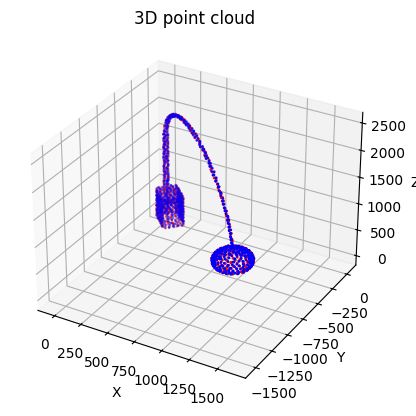

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, c='blue')
ax.scatter(p2[:, 0], p2[:, 1], p2[:, 2], s=1, c='red')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D point cloud')

In [15]:
points.shape, p2.shape

((1000, 3), (1000, 3))

In [22]:
points - p2

array([[ 2.09248201e+00,  2.85549124e+00,  3.48937206e+00],
       [-3.23395106e+01, -4.84505696e+01,  1.88997416e+01],
       [ 1.85925556e+01,  2.20833698e+01,  2.70726724e+01],
       ...,
       [ 5.97251104e+00,  1.06092634e+01, -6.46907097e+02],
       [ 8.53838436e+00,  1.43835335e+01, -7.51676832e+01],
       [ 2.67731298e-01,  2.63586032e+00,  1.09564835e+03]])